# TV regularization demo 1

We try to solve the following projection problem in this notebook:
$$\min_u \frac{1}{2} \|u-g\|^2 + \lambda TV(u).$$

The dual problem is:
$$\min_{w\in K} \frac{1}{2} \|w-\frac{g}{\lambda}\|^2 + \frac{1}{\lambda} TV^*(w).$$

In [1]:
using PyPlot

include("TV_projection.jl");

In [2]:
Nx = 101
Ny = 121
h = 0.01

x = range(0,step=h,length=Nx)
y = range(0,step=h,length=Ny)

g = sin.(2*pi*5*x .+ 2*pi*5*y');
g[30:50,50:80] .= 0;
g = g .+ 1;

In [3]:
u1 = TV_projection(g, 0.5; iterMax=5000);
u2 = TV_projection(g, 1; iterMax=5000);
u3 = TV_projection(g, 3; iterMax=5000);

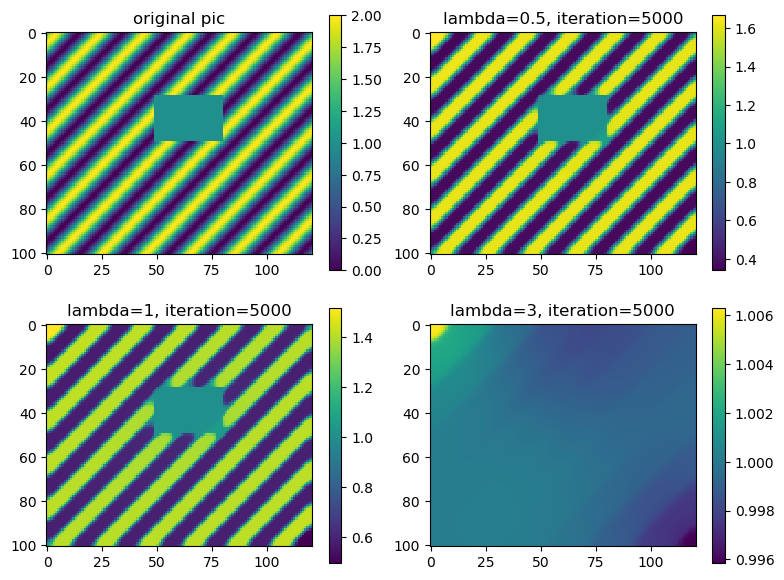

In [4]:
figure(figsize=(8,6))

subplot(221)
imshow(g); title("original pic"); colorbar()

subplot(222)
imshow(u1); title("lambda=0.5, iteration=5000"); colorbar()

subplot(223)
imshow(u2); title("lambda=1, iteration=5000"); colorbar()

subplot(224)
imshow(u3); title("lambda=3, iteration=5000"); colorbar()

tight_layout()

In [5]:
Nx = 101
Ny = 121
h = 0.01

x = range(0,step=h,length=Nx)
y = range(0,step=h,length=Ny)

g = sin.(2*pi*3*x .+ 2*pi*2*y');

radius = 30
center = [50,50]
for i = 1:Nx
    for j = 1:Ny
        if (i-center[1]).^2 + (j-center[2]).^2 < radius^2
            g[i,j] = 0
        end
    end
end


In [6]:
u1 = TV_projection(g, 0.5; iterMax=5000);
u2 = TV_projection(g, 1; iterMax=5000);
u3 = TV_projection(g, 3; iterMax=5000);

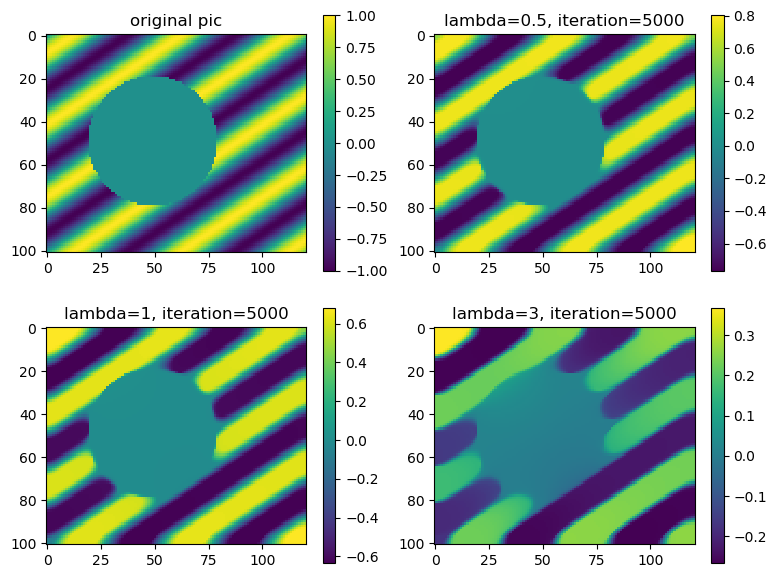

In [7]:
figure(figsize=(8,6))

subplot(221)
imshow(g); title("original pic"); colorbar()

subplot(222)
imshow(u1); title("lambda=0.5, iteration=5000"); colorbar()

subplot(223)
imshow(u2); title("lambda=1, iteration=5000"); colorbar()

subplot(224)
imshow(u3); title("lambda=3, iteration=5000"); colorbar()

tight_layout()